In [60]:
import pandas as pd
import numpy as np
import math

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import svm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(font_scale=1.2)


data = pd.read_csv('credit_data_.csv', header=None)
data.columns = ['wcta', 'reta', 'ebitta', 'mvebvtd', 'sta', 'ind']
label = [1]*1540 + [0]*130
data['Type'] = label

data.head()


,wcta,reta,ebitta,mvebvtd,sta,ind,Type
0,0.121,0.413,0.057,3.647,0.466,12,1
1,0.470,0.752,0.070,11.596,1.120,8,1
2,0.110,0.337,0.045,3.835,0.812,4,1
3,0.511,0.869,0.106,8.538,0.732,2,1
4,0.202,0.460,0.064,3.685,0.682,4,1


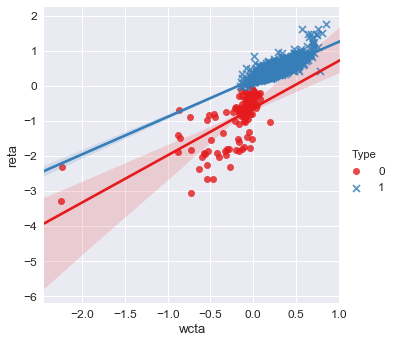

In [28]:
sns.lmplot('wcta', 'reta', data=data, hue='Type', palette='Set1',markers=["o", "x"])
plt.show()

In [29]:
k=10
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
scores = []

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma=0.5, C=1)
    score = cross_val_score(clf, data, label, cv=k)
    scores.append(score)
    print("\n k={:d}".format(k) + "fold cross validation \n")
    print("SVM classification under kernel ** " + str(kernel) + " ** is :\n\ " + str(score)
         )
    



 k=10fold cross validation 

SVM classification under kernel ** linear ** is :
\ [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

 k=10fold cross validation 

SVM classification under kernel ** rbf ** is :
\ [ 0.99401198  1.          1.          1.          1.          1.          1.
  0.99401198  0.99401198  1.        ]

 k=10fold cross validation 

SVM classification under kernel ** poly ** is :
\ [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

 k=10fold cross validation 

SVM classification under kernel ** sigmoid ** is :
\ [ 0.92215569  0.92215569  0.92215569  0.92215569  0.92215569  0.92215569
  0.92215569  0.92215569  0.92215569  0.92215569]


In [43]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y , classifier, test_idx=None, resolution =0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o','^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), 
                    marker=markers[idx], label=cl)
        
    #highlight test samples
    
    if test_idx:
        #plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha =1.0, linewidths=1, 
                    marker='o', s=55, label='test set')    

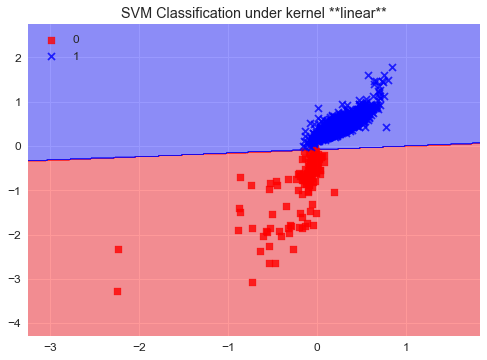

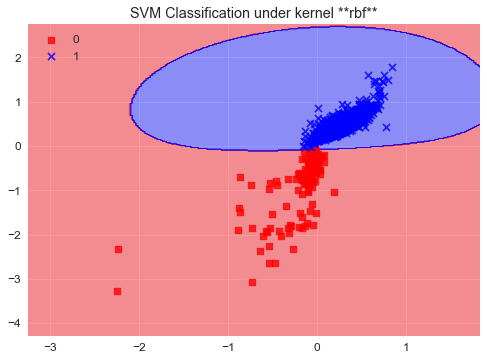

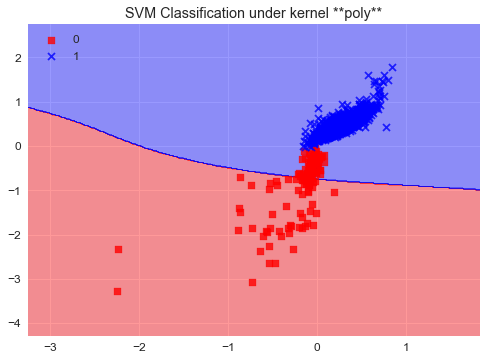

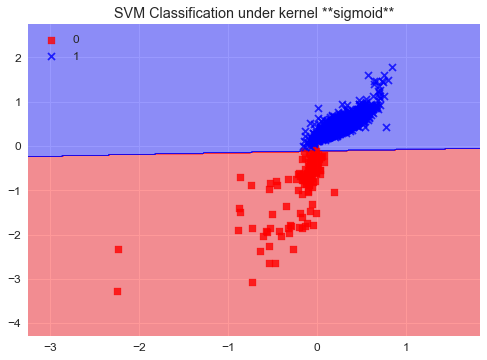

In [46]:
X = pd.DataFrame.as_matrix(data.iloc[:, 0:2])
Y = pd.DataFrame.as_matrix(data.iloc[:, 6])
fignum = 1

for kernel in kernels:
    plt.figure(fignum, figsize = (7, 5))
    clf = svm.SVC(kernel=kernel, gamma=0.5, C=1)
    clf.fit(X, Y)
    
    plot_decision_regions(X, Y, classifier=clf)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title("SVM Classification under kernel **" + str(kernel) + "**")
    fignum = fignum + 1
    plt.show()
    

In [48]:
x1 = np.matrix(X[:, 0])
x2 = np.matrix(X[:, 1])
k_linear = x1.T * x2

w, v = np.linalg.eig(k_linear)
w

array([  2.49213147e+002 +0.00000000e+00j,
        -2.22323560e-014 +1.33113268e-14j,
        -2.22323560e-014 -1.33113268e-14j, ...,
        -9.22828213e-139 +0.00000000e+00j,
         5.75771352e-139 +0.00000000e+00j,
         2.77345854e-138 +0.00000000e+00j])

In [49]:
np.where(w<0)

(array([   1,    2,    4,    5,    6,    7,    8,   22,   23,   26,   27,
          28,   29,   30,   32,   33,   37,   38,   39,   40,   43,   44,
          45,   46,   47,   48,   49,   50,   53,   54,   57,   58,   59,
          60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
          73,   74,   75,   76,   77,   78,   87,   88,  103,  104,  111,
         112,  115,  116,  117,  118,  121,  122,  123,  124,  125,  126,
         127,  128,  129,  130,  131,  132,  143,  144,  145,  146,  153,
         154,  159,  160,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  176,  177,  186,  189,  190,  191,  192,  197,  198,  199,
         200,  203,  204,  205,  210,  211,  212,  213,  216,  217,  220,
         221,  222,  223,  224,  227,  228,  237,  238,  239,  240,  241,
         242,  243,  244,  251,  252,  253,  258,  259,  266,  267,  268,
         269,  270,  271,  274,  275,  276,  277,  280,  281,  282,  288,
         289,  290,  291,  292,  293, 

In [57]:
clf = svm.SVC(kernel='linear', gamma=0.5, C=1)
clf.fit(X, Y)
svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, 
    degree=3, gamma=0.5, kernel='linear', max_iter=-1, probability=False, random_state=None, 
    shrinking=True, tol=0.001, verbose=False)
d=3
k_linear =( 1 + k_linear)**d
coef0 =clf.coef_[0]
w1, v1 = np.linalg.eig(k_linear)
w1

array([  5.77848069e+09 +0.00000000e+00j,
         1.94078444e+06 +0.00000000e+00j,
         1.57782715e-06 +0.00000000e+00j, ...,
        -5.03418332e-70 +1.13297456e-69j,
        -5.03418332e-70 -1.13297456e-69j,   3.49905287e-69 +0.00000000e+00j])

In [58]:
v1

matrix([[-0.02371243 +0.00000000e+00j,  0.01139727 +0.00000000e+00j,
         -0.00207515 +0.00000000e+00j, ...,  0.00999248 -5.74448139e-03j,
          0.00999248 +5.74448139e-03j,  0.00761176 +0.00000000e+00j],
        [-0.02659543 +0.00000000e+00j, -0.02818817 +0.00000000e+00j,
          0.02145252 +0.00000000e+00j, ...,  0.00056599 -2.42023951e-04j,
          0.00056599 +2.42023951e-04j,  0.00080634 +0.00000000e+00j],
        [-0.02362157 +0.00000000e+00j,  0.01264495 +0.00000000e+00j,
          0.03929955 +0.00000000e+00j, ...,  0.00105939 +9.35722972e-05j,
          0.00105939 -9.35722972e-05j,  0.01313705 +0.00000000e+00j],
        ..., 
        [-0.02149856 +0.00000000e+00j,  0.04179526 +0.00000000e+00j,
         -0.02292613 +0.00000000e+00j, ..., -0.01065685 +9.37373667e-03j,
         -0.01065685 -9.37373667e-03j,  0.02498334 +0.00000000e+00j],
        [-0.02093683 +0.00000000e+00j,  0.04950818 +0.00000000e+00j,
         -0.03528204 +0.00000000e+00j, ...,  0.00736989 +8.136272

In [65]:
k_sigmoid = (np.tanh(k_linear))
w3, v3 = np.linalg.eig(k_sigmoid)
w3

array([  1.67000000e+003+0.j,   2.66966390e-013+0.j,  -2.54299156e-013+0.j,
       ...,  -4.94065646e-324+0.j,  -4.94065646e-324+0.j,
        -0.00000000e+000+0.j])

In [66]:
v3

matrix([[  2.44704392e-02+0.j,  -9.40664901e-01+0.j,  -9.35208300e-01+0.j,
         ...,  -1.39082982e-19+0.j,  -1.39423054e-19+0.j,
           1.39205889e-19+0.j],
        [  2.44704392e-02+0.j,   3.39017004e-01+0.j,  -3.52691111e-01+0.j,
         ...,   1.10126126e-07+0.j,   1.10126152e-07+0.j,
          -1.10126149e-07+0.j],
        [  2.44704392e-02+0.j,   3.60700178e-04+0.j,   7.72121949e-04+0.j,
         ...,   1.31328825e-07+0.j,   1.31328449e-07+0.j,
          -1.31328488e-07+0.j],
        ..., 
        [  2.44704392e-02+0.j,   3.60700178e-04+0.j,   7.72121949e-04+0.j,
         ...,  -4.74500436e-11+0.j,  -4.74502799e-11+0.j,
           4.74502554e-11+0.j],
        [  2.44704392e-02+0.j,   3.60700178e-04+0.j,   7.72121949e-04+0.j,
         ...,  -4.74500436e-11+0.j,  -4.74502799e-11+0.j,
           4.74502554e-11+0.j],
        [  2.44704392e-02+0.j,   3.60700178e-04+0.j,   7.72121949e-04+0.j,
         ...,  -4.37537800e-11+0.j,  -4.37540242e-11+0.j,
           4.37539987e-11+0.